<a href="https://colab.research.google.com/github/mitali72/Generating-aligned-transcripts/blob/main/TextAlignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pip setuptools wheel
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !mkdir /content/drive/MyDrive/BTP/NSD-Marathi-Marathi-1330-1340-2022820165427_stt
import os
# Load text for each semgnet
stt_path = "/content/drive/MyDrive/BTP/NSD-Marathi-Marathi-1330-1340-2022820165427_stt2"
stt_files = os.listdir(stt_path)
stt_files = [file for file in stt_files if file.endswith(".txt")]
trans_txt = []
chunk_name = []
for stt_file in stt_files:
  phrase = ""
  with open(os.path.join(stt_path,stt_file)) as f_in:
    lines = (line.rstrip() for line in f_in)
    for line in lines:
      if line:
        phrase+=line 

    trans_txt.append(phrase)
    chunk_name.append(stt_file)

print(trans_txt)
print(chunk_name)

['अखेश्वानी मूमभी', 'अदेश नाएक', 'राश्ट्रिया बात्म्या दिता हे', 'तो ड़ाद बाद में', 'इंदेशातल्या बैंका प्रशासक्या दूष्त्या सक्शम होत अस्लया', 'तरी समाजिक धुश्टी को तों अदिक सुदारना अवश्यक अज्लेचा', 'रीजरो बेंकेचा अप्यास अहवालात मत्ला है', 'बार्तिया बेंकान सो प्रशासन', 'कर्यक्शमता अने सुबोदता या बढब तरीजरो बेंके चा हा अवाल असुनगेल्या कही वर्षाद भर्तात्या बेंकानी प्रशासा किया प्रमणाकान सा पालन के ला अस्लग', 'तरी सा ड्यामात्रा या चास्तोर', 'पूरे सा योगे नास्लाचा या अवालात मतला है', 'बेंकान जा दिर्गखालिन कर्यगाडा जोखिम तारनेक्र ता शाश्वत लबाचा उपाएजुना ना चालना दे़ा अवश्यक अस्लय ज़ा या अह्वालात मतला है', '2018-9-2012बारा तिरा या का लवोदित', 'भारद्या बैंकेंग उद्ध्योगाची स्तितिट सानली होती', 'मात्र 2013-14 नत्र याद माल्मत्त, गुणुवत्त, अन नफ्याचा दुष्टी कोना तुन गस्रन सुरुजाली, असर्या अह्वालात मत्ला है.', 'सवरीं गोल्डबाश्टी दुस्री मालिका ये तेस उमर पसुन विक्री साटी खूली होनारसुन फि विक्री शुक्रवार परेंत शुरूर अनार है', 'मुदोती दर में या रोक्यान सा वित्रन्दर पास्थादार एक्षे सत्ट्यान्व रुपे प्रत

In [ ]:
orig_txt_list = []
# Load text from original transcript
with open('/content/drive/MyDrive/BTP/orig.txt') as f_in:
    lines = (line.rstrip() for line in f_in) # All lines including the blank ones
    curr = []
    for line in lines:
      if line:
        curr.append(line)
      else:
        if curr:
          orig_txt_list.append(" ".join(curr))  # Non-blank lines in a list
        curr = []

print(orig_txt_list)

['आकाशवाणी मुंबई राष्ट्रीय बातमीपत्र - दु. १.३०वाजता २० ऑगस्ट २०२२ - शनिवार ठळक बातम्या', 'देशातल्या बँका प्रशासकीयदृष्ट्या सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचा रिझर्व बँकेचा अहवाल', 'माजी प्रधानमंत्री दिवंगत राजीव गांधी यांच्या जयंतीनिमित्त देशाची आदरांजली', 'महाराष्ट्रात जखमी गोविंदांच्या उपचारांबाबतचे शासन निर्णय जारी/ मुंबईत काल दिवसभरात १११ गोविंदा जखमी राजस्थानात पाली इथं रस्ते अपघातात ७ जण ठार, तर २४ हून अधिक जखमी', 'झिंबाब्वेबरोबर दुसऱ्या एकदिवसीय क्रिकेट सामन्यात नाणेफेक जिंकून भारताचा क्षेत्ररक्षणाचा निर्णय', "देशातल्या बँका प्रशासकीयदृष्टया सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचं भारतीय रिझर्व बँकेच्या अभ्यास अहवालात म्हटलं आहे. भारतीय बँकांचं 'प्रशासन, कार्यक्षमता आणि सुबोधता' याबाबत रिझर्व बँकेचा हा अहवाल असून गेल्या काही वर्षात भारतातल्या बँकांनी प्रशासकीय प्रमाणकांच पालन केलं असलं तरी सध्या मात्र याचा स्तर पुरेसा योग्य नसल्याचं या अहवालात म्हटलं आहे. बँकांच्या दीर्घकालीन कार्यकाळात जोखीम टाळण्याकरता शाश्व

In [ ]:
import spacy

from spacy.lang.mr import Marathi
nlp = Marathi()  # use directly

# Create the pipeline 'sentencizer' component
# sbd = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe('sentencizer')

#  "nlp" Object is used to create documents with linguistic annotations.
orig_sent = []
for line in orig_txt_list:
  doc = nlp(line)

  # create list of sentence tokens
  for sent in doc.sents:
    orig_sent.append(sent.text)

print(orig_sent)
# orig_tokenized = [token.text for token in doc]
# print(orig_tokenized)

['आकाशवाणी मुंबई राष्ट्रीय बातमीपत्र - दु.', '१.३०वाजता २० ऑगस्ट २०२२ - शनिवार ठळक बातम्या', 'देशातल्या बँका प्रशासकीयदृष्ट्या सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचा रिझर्व बँकेचा अहवाल', 'माजी प्रधानमंत्री दिवंगत राजीव गांधी यांच्या जयंतीनिमित्त देशाची आदरांजली', 'महाराष्ट्रात जखमी गोविंदांच्या उपचारांबाबतचे शासन निर्णय जारी/ मुंबईत काल दिवसभरात १११ गोविंदा जखमी राजस्थानात पाली इथं रस्ते अपघातात ७ जण ठार, तर २४ हून अधिक जखमी', 'झिंबाब्वेबरोबर दुसऱ्या एकदिवसीय क्रिकेट सामन्यात नाणेफेक जिंकून भारताचा क्षेत्ररक्षणाचा निर्णय', 'देशातल्या बँका प्रशासकीयदृष्टया सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचं भारतीय रिझर्व बँकेच्या अभ्यास अहवालात म्हटलं आहे.', "भारतीय बँकांचं 'प्रशासन, कार्यक्षमता आणि सुबोधता' याबाबत रिझर्व बँकेचा हा अहवाल असून गेल्या काही वर्षात भारतातल्या बँकांनी प्रशासकीय प्रमाणकांच पालन केलं असलं तरी सध्या मात्र याचा स्तर पुरेसा योग्य नसल्याचं या अहवालात म्हटलं आहे.", 'बँकांच्या दीर्घकालीन कार्यकाळात जोखीम टाळण्याक

In [ ]:
from difflib import SequenceMatcher
import numpy as np
from tqdm import tqdm


def dist(trans_sent,orig_sent):
  mat = np.zeros((len(trans_sent),len(orig_sent)))
  for trans_i in tqdm(range(len(trans_sent))):
    for orig_j in range(len(orig_sent)):
      mat[trans_i][orig_j] = SequenceMatcher(a=trans_sent[trans_i],b=orig_sent[orig_j]).ratio()
  return mat

In [ ]:
import matplotlib.pyplot as plt
mat = dist(trans_txt, orig_sent)


100%|██████████| 77/77 [00:05<00:00, 15.40it/s]


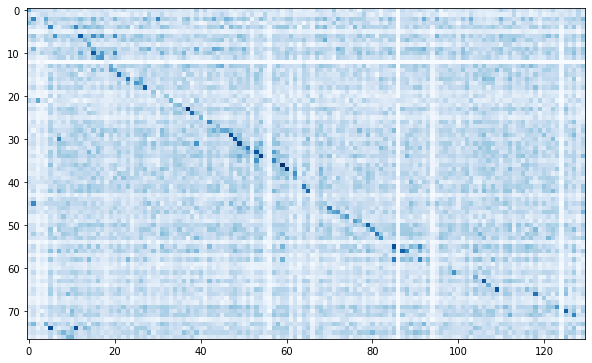

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(mat, cmap='Blues', interpolation='nearest')
plt.show()

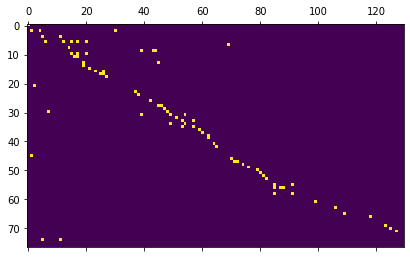

In [ ]:
threshold = 0.4
test_mat = np.array(mat[:,:])
match_count = 0
for i in range(len(trans_txt)):
  for j in range(len(orig_sent)):
    if test_mat[i][j] < threshold:
      test_mat[i][j] = 0
    else:
      test_mat[i][j] = 1
      match_count+=1
plt.matshow(test_mat)

In [ ]:
print(f"Num of matches {match_count}/{len(trans_txt)}")


Num of matches 81/77


In [ ]:
for i in range(test_mat.shape[0]):
  for j in range(test_mat.shape[1]):
    if test_mat[i][j]==1:
      print(f"Transcribed text for chunk-{i}: {trans_txt[i]}")
      print(f"Original text algined with : {orig_sent[j]}")
      print()

# Approximate string matching

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(trans_txt[0])
print(orig_sent[0])

अखेश्वानी मूमभी
आकाशवाणी मुंबई राष्ट्रीय बातमीपत्र - दु.


In [ ]:
# Replace similar sounding letters
replacements = {"ख":"क","छ":"च","ठ":"त","थ":"त","ट":"त","ध":"द","भ":"ब","झ":"ज","घ":"ग","ण":"न","ष":"श"}

# print(trans_txt[0].replace("ख","क"))

In [ ]:
# Remove punctuations
trans_txt_rpunc = trans_txt.copy()
orig_sent_rpunc = orig_sent.copy()

for i in range(len(trans_txt)):
  trans_txt_rpunc[i] = trans_txt_rpunc[i].replace(".","").replace(",","").replace("-","")

for i in range(len(orig_sent)):
  # for key in replacements:
    orig_sent_rpunc [i] = orig_sent[i].replace(".","").replace(",","").replace("-","")

# orig_sent_rpunc = orig_sent.replace(".","").replace(",","")
# trans_txt_rpunc = trans_txt.replace(".","").replace(",","")
print(orig_sent_rpunc[0])
print(trans_txt_rpunc[0])

आकाशवाणी मुंबई राष्ट्रीय बातमीपत्र  दु
अखेश्वानी मूमभी


In [ ]:
# Replace letters
trans_txt_rep = trans_txt.copy()
orig_sent_rep = orig_sent.copy()

for i in range(len(trans_txt)):
  for key in replacements:
    trans_txt_rep[i] = trans_txt_rep[i].replace(key,replacements[key])

for i in range(len(orig_sent)):
  for key in replacements:
    orig_sent_rep[i] = orig_sent_rep[i].replace(key,replacements[key])

In [ ]:
from difflib import SequenceMatcher as SM
from nltk.util import ngrams
import codecs
import csv

# Approximate string matching using SequenceMatcher
chunk_fields = ["ChunkName","Transcribed", "BestCompWith", "SubstrMatch", "SimilarityScore"]

with open('/content/drive/MyDrive/BTP/text_align5.csv','w') as f:
  writer = csv.DictWriter(f, fieldnames = chunk_fields)
  writer.writeheader()
  text_align = {}
  for i in range(len(trans_txt_rpunc)):
    max_sim_val    = 0
    max_sim_string = u""
    best_comp = ""
    for j in range(len(orig_sent_rpunc)):  
      orig_ngram = orig_sent_rpunc[j].split()
      ngram_len = min(len(orig_ngram),len(trans_txt_rpunc[i].split()))

      nwords_range = []
      # if ngram_len>=3:
        # nwords_range = [ngram_len,ngram_len-1]
      if ngram_len>=2:
        nwords_range = [ngram_len,ngram_len-1]
      else:
        nwords_range = [ngram_len]

      for nwords in nwords_range:
        for ngram in ngrams(orig_ngram, nwords):
            ngram_joined = u" ".join(ngram)
            similarity = SM(lambda x: x==" ", trans_txt_rpunc[i], ngram_joined).ratio()
            if similarity > max_sim_val:

              y = (len(orig_sent_rpunc)-1)*i/(len(trans_txt_rpunc)-1)
              if (j>=(y-10) and (j<=y+10)):
                max_sim_val = similarity
                max_sim_string = ngram_joined
                best_comp = orig_sent_rpunc[j]
          
    
    text_align["ChunkName"] = chunk_name[i]
    text_align["Transcribed"] = trans_txt_rpunc[i]
    text_align["BestCompWith"] = best_comp
    text_align["SubstrMatch"] = max_sim_string
    text_align["SimilarityScore"] = round(max_sim_val,2)
    print(f"Trascribed text: {trans_txt_rpunc[i]}, best comparision string: {best_comp}, string matched with: {max_sim_string} with similarity score of {round(max_sim_val,2)}")
    writer.writerow(text_align)

Trascribed text: अखेश्वानी मूमभी, best comparision string: आकाशवाणी मुंबई राष्ट्रीय बातमीपत्र  दु, string matched with: आकाशवाणी मुंबई with similarity score of 0.41
Trascribed text: अदेश नाएक, best comparision string: माजी प्रधानमंत्री दिवंगत राजीव गांधी यांच्या जयंतीनिमित्त देशाची आदरांजली, string matched with: देशाची with similarity score of 0.53
Trascribed text: राश्ट्रिया बात्म्या दिता हे, best comparision string: आकाशवाणी मुंबई राष्ट्रीय बातमीपत्र  दु, string matched with: राष्ट्रीय बातमीपत्र दु with similarity score of 0.57
Trascribed text: तो ड़ाद बाद में, best comparision string: १३०वाजता २० ऑगस्ट २०२२  शनिवार ठळक बातम्या, string matched with: शनिवार ठळक बातम्या with similarity score of 0.3
Trascribed text: इंदेशातल्या बैंका प्रशासक्या दूष्त्या सक्शम होत अस्लया, best comparision string: देशातल्या बँका प्रशासकीयदृष्ट्या सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचा रिझर्व बँकेचा अहवाल, string matched with: देशातल्या बँका प्रशासकीयदृष्ट्या सक्षम होत असल्

In [ ]:
# print("Transcribed text: ", trans_txt[0])
# print("Target text: ", orig_sent[0])
# s = SequenceMatcher(a=trans_txt[0],b=orig_sent[0])

# for block in s.get_matching_blocks():
#   trans_txt[%d] and orig_sent[%d] match for %d elements" % block)
#   print(f"matched with: {orig_sent[0][block[1]:block[1]+block[2]]}")print("Transcribed text: ", trans_txt[0])
#   print("Target text: ", orig_sent[0])
#   s = SequenceMatcher(a=trans_txt[0],b=orig_sent[0])
  
#   for block in s.get_matching_blocks():
#     print("trans_txt[%d] and orig_sent[%d] match for %d elements" % block)
#       print(f"matched with: {orig_sent[0][block[1]:block[[%d] and orig_sent[%d] match for %d elements" % block)
#   print(f"matched with: {orig_sent[0][block[1]:block[1]+block[2]]}")

# **Edit distance based**

In [ ]:
from itertools import product
from collections import deque


def needleman_wunsch(x, y):
    """Run the Needleman-Wunsch algorithm on two sequences.

    x, y -- sequences.

    Code based on pseudocode in Section 3 of:

    Naveed, Tahir; Siddiqui, Imitaz Saeed; Ahmed, Shaftab.
    "Parallel Needleman-Wunsch Algorithm for Grid." n.d.
    https://upload.wikimedia.org/wikipedia/en/c/c4/ParallelNeedlemanAlgorithm.pdf
    """
    N, M = len(x), len(y)
    s = lambda a, b: int(a == b)

    DIAG = -1, -1
    LEFT = -1, 0
    UP = 0, -1

    # Create tables F and Ptr
    F = {}
    Ptr = {}

    F[-1, -1] = 0
    for i in range(N):
        F[i, -1] = -i
    for j in range(M):
        F[-1, j] = -j

    option_Ptr = DIAG, LEFT, UP
    for i, j in product(range(N), range(M)):
        option_F = (
            F[i - 1, j - 1] + s(x[i], y[j]),
            F[i - 1, j] - 1,
            F[i, j - 1] - 1,
        )
        F[i, j], Ptr[i, j] = max(zip(option_F, option_Ptr))

    # Work backwards from (N - 1, M - 1) to (0, 0)
    # to find the best alignment.
    alignment = deque()
    i, j = N - 1, M - 1
    while i >= 0 and j >= 0:
        direction = Ptr[i, j]
        if direction == DIAG:
            element = i, j
        elif direction == LEFT:
            element = i, None
        elif direction == UP:
            element = None, j
        alignment.appendleft(element)
        di, dj = direction
        i, j = i + di, j + dj
    while i >= 0:
        alignment.appendleft((i, None))
        i -= 1
    while j >= 0:
        alignment.appendleft((None, j))
        j -= 1

    return list(alignment)

def align_fast(x, y):
    """Align two sequences, maximizing the
    alignment score, using the Needleman-Wunsch
    algorithm.

    x, y -- sequences.
    """
    return needleman_wunsch(x, y)

def aligned_string(indices,x,y):

  x_end = len(x) -1
  for match_index in indices:
    if match_index[0] == 0:
      start = match_index[1]
    elif match_index[0] == x_end:
      end = match_index[1]

  return y[start:end+1]

# test on two strings samples
indices = align_fast("इंदेशातल्या बैंका प्रशासक्या दूष्त्या सक्शम होत अस्लया", "देशातल्या बँका प्रशासकीयदृष्ट्या सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचा रिझर्व बँकेचा अहवाल")
# print(indices)
# print(aligned_string(indices, trans_txt[3], orig_sent[1]))

In [ ]:
def print_alignment(x, y, alignment):
    print("".join(
        "-" if i is None else x[i] for i, _ in alignment
    ))
    print("".join(
        "-" if j is None else y[j] for _, j in alignment
    ))

print_alignment("इंदेशातल्या बैंका प्रशासक्या दूष्त्या सक्शम होत अस्लया", "देशातल्या बँका प्रशासकीयदृष्ट्या सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचा रिझर्व बँकेचा अहवाल", indices)

इंदेशातल्या बैंका प्रशासक-----्--या दू-ष्---त----्या सक्श--म---- ह------ो--त-- अ----स----------्-----ल-या----------------------
--देशातल्या बँ-का प्रशासकीयदृष्ट्या सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचा रिझर्व बँकेचा अहवाल


# Smith-Waterman (local alignment)

In [ ]:
import itertools
import numpy as np

def matrix(a, b, match_score=3, gap_cost=2):
    H = np.zeros((len(a) + 1, len(b) + 1), np.int)

    for i, j in itertools.product(range(1, H.shape[0]), range(1, H.shape[1])):
        match = H[i - 1, j - 1] + (match_score if a[i - 1] == b[j - 1] else - match_score)
        delete = H[i - 1, j] - gap_cost
        insert = H[i, j - 1] - gap_cost
        H[i, j] = max(match, delete, insert, 0)
    return H

def traceback(H, b, b_='', old_i=0):
    # flip H to get index of **last** occurrence of H.max() with np.argmax()
    H_flip = np.flip(np.flip(H, 0), 1)
    i_, j_ = np.unravel_index(H_flip.argmax(), H_flip.shape)
    i, j = np.subtract(H.shape, (i_ + 1, j_ + 1))  # (i, j) are **last** indexes of H.max()
    if H[i, j] == 0:
        return b_, j
    b_ = b[j - 1] + '-' + b_ if old_i - i > 1 else b[j - 1] + b_
    return traceback(H[0:i, 0:j], b, b_, i)

def smith_waterman(a, b, match_score=3, gap_cost=2):
    a, b = a.upper(), b.upper()
    H = matrix(a, b, match_score, gap_cost)
    b_, pos = traceback(H, b)
    return pos, pos + len(b_)

# prints correct scoring matrix from Wikipedia example
# print(matrix('GGTTGACTA', 'TGTTACGG'))

# a, b = 'ggttgacta', 'tgttacgg'
# H = matrix(a, b)
# print(traceback(H, b)) # ('gtt-ac', 1)


start, end = smith_waterman(orig_sent[1], trans_txt[3])
print(orig_sent[1][start:end])     # GTTGAC

१.३०वा


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
import regex

# fuzzy matching based
for i in range(len(trans_txt_rep[:5])):
  max_sim_val    = 0
  max_sim_string = u""
  best_comp = ""
  for j in range(len(orig_sent_rep)):  
    match = regex.search(f"({trans_txt_rep[i]}){{e<={len(trans_txt_rep[i])}}}", orig_sent_rep[j])
    if match:
      similarity = SM(None, orig_sent_rep[j][match.span()[0]:match.span()[1]], trans_txt_rep[i]).ratio()

      if similarity > max_sim_val:
        y = (len(orig_sent_rep)-1)*i/(len(trans_txt_rep)-1)
        if (j>=(y-20) and (j<=y+20)):
          max_sim_val = similarity
          max_sim_string = orig_sent_rep[j][match.span()[0]:match.span()[1]]
          best_comp = orig_sent[j]

  # text_align["ChunkName"] = chunk_name[i]
  # text_align["Transcribed"] = trans_txt[i]
  # text_align["BestCompWith"] = best_comp
  # text_align["SubstrMatch"] = max_sim_string
  # text_align["SimilarityScore"] = round(max_sim_val,2)
  print(f"Trascribed text: {trans_txt[i]}, best comparision string: {best_comp}, string matched with: {max_sim_string} with similarity score of {round(max_sim_val,2)}")
  # writer.writerow(text_align)

Trascribed text: अखेश्वानी मूमभी, best comparision string: आकाशवाणी मुंबई राष्ट्रीय बातमीपत्र - दु., string matched with: आकाशवानी मुंबई  with similarity score of 0.6
Trascribed text: अदेश नाएक, best comparision string: देशातल्या बँका प्रशासकीयदृष्ट्या सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचा रिझर्व बँकेचा अहवाल, string matched with: देशातल्या with similarity score of 0.44
Trascribed text: राश्ट्रिया बात्म्या दिता हे, best comparision string: परराष्ट्र मंत्र्यांचा दक्षिण अमेरिका प्रदेशाचा हा पहिलाच दौरा आहे., string matched with: परराश्त्र मंत्र्यांचा दक्शि with similarity score of 0.56
Trascribed text: तो ड़ाद बाद में, best comparision string: आकाशवाणी मुंबई राष्ट्रीय बातमीपत्र - दु., string matched with: आकाशवानी मुंबई  with similarity score of 0.33
Trascribed text: इंदेशातल्या बैंका प्रशासक्या दूष्त्या सक्शम होत अस्लया, best comparision string: देशातल्या बँका प्रशासकीयदृष्ट्या सक्षम होत असल्या तरी सामाजिक दृष्टिकोनातून अधिक सुधारणा आवश्यक असल्याचा रिझर